<a href="https://colab.research.google.com/github/iEpsilon-FPS/QU-MLinF/blob/master/2.3%20ExploratoryDataAnalysis_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Intallation
Install [fredapi](https://github.com/mortada/fredapi) to get api, fredapi is a third-party tool to get access to database of FRED.

You will need an API key to access data. Get your API key [here](https://research.stlouisfed.org/useraccount/login/secure/)

In [1]:
!pip install fredapi

## Import necessary packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
plt.style.use('seaborn')

## Get data from FRED
* S&P500
* Crude Oil Prices: West Texas Intermediate (WTI) - Cushing, Oklahoma
* CBOE 10-Year Treasury Note Volatility Futures

A demo on CBOE 10-Year Treasury Note Volatility Futures is given in this exercise.

In [4]:
fred_api_key = '47eddec2d4ed79baa2746af4e7fbd8c4' # Note: Your api key is the one you got here: https://research.stlouisfed.org/useraccount/login/secure/

In [5]:
from fredapi import Fred
fred = Fred(api_key = fred_api_key)

In [8]:
try:
  sp500 = fred.get_series('SP500') # S&P 500
  wti_oil = fred.get_series('DCOILWTICO') # Crude Oil Prices: West Texas Intermediate (WTI) - Cushing, Oklahoma
  us_notes = fred.get_series('VXTYN') # CBOE 10-Year Treasury Note Volatility Futures
except ValueError as err:
  print('Handling run-time error:', err)
  print('Getting static data')
  sp500 = pd.read_csv('https://mlinfinance.s3-us-west-2.amazonaws.com/Module2-ExploratoryDataAnalysis/sp500.csv',header=None, parse_dates=[0], index_col=0, squeeze=True)
  wti_oil = pd.read_csv('https://mlinfinance.s3-us-west-2.amazonaws.com/Module2-ExploratoryDataAnalysis/wti_oil.csv',header=None, parse_dates=[0], index_col=0, squeeze=True)
  us_notes = pd.read_csv('https://mlinfinance.s3-us-west-2.amazonaws.com/Module2-ExploratoryDataAnalysis/us_notes.csv',header=None, parse_dates=[0], index_col=0, squeeze=True)



In [9]:
sp500.head()

2010-08-09    1127.79
2010-08-10    1121.06
2010-08-11    1089.47
2010-08-12    1083.61
2010-08-13    1079.25
dtype: float64

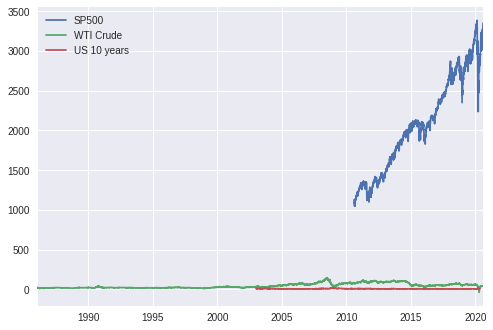

In [11]:
df = {} #Pandas DataFrame (?)
df['SP500'] = sp500
df['WTI Crude'] = wti_oil
df['US 10 years'] = us_notes
df = pd.DataFrame(df)
df.plot()

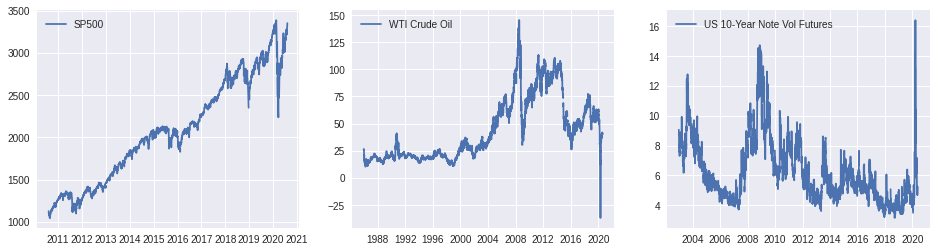

In [13]:
fig, axes = plt.subplots(1,3,figsize=(16,4))
axes[0].plot(sp500,label='SP500');axes[0].legend()
axes[1].plot(wti_oil,label='WTI Crude Oil');axes[1].legend()
axes[2].plot(us_notes,label='US 10-Year Note Vol Futures');axes[2].legend()

#Note that we have negative values; For analysis, we will replace it with the min value that is greater than 0

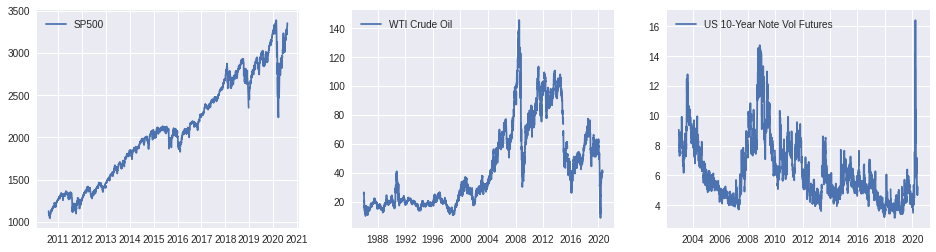

In [14]:
# this is to adress the negative value of FUT(WTI) during the Covid pandemic
sp500[sp500<=0] = sp500[sp500>0].min()
wti_oil[wti_oil<=0] = wti_oil[wti_oil>0].min()
us_notes[us_notes<=0] = us_notes[us_notes>0].min()
fig, axes = plt.subplots(1,3,figsize=(16,4))

axes[0].plot(sp500,label='SP500');axes[0].legend()
axes[1].plot(wti_oil,label='WTI Crude Oil');axes[1].legend()
axes[2].plot(us_notes,label='US 10-Year Note Vol Futures');axes[2].legend()

#View in log space

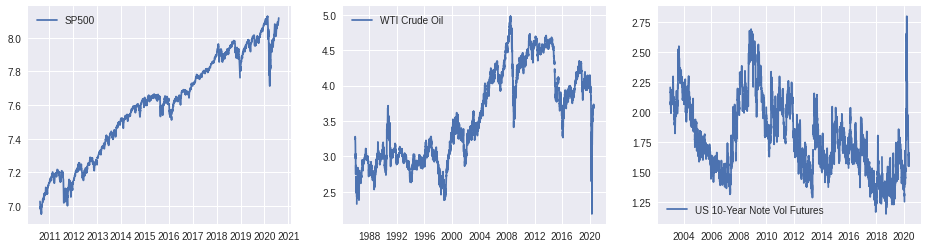

In [16]:
# take log of price
log_sp500 = np.log(sp500)
log_wti_oil = np.log(wti_oil)
log_us_notes = np.log(us_notes)

fig, axes = plt.subplots(1,3,figsize=(16,4))
axes[0].plot(log_sp500,label='SP500');axes[0].legend()
axes[1].plot(log_wti_oil,label='WTI Crude Oil');axes[1].legend()
axes[2].plot(log_us_notes,label='US 10-Year Note Vol Futures');axes[2].legend()

#View returns

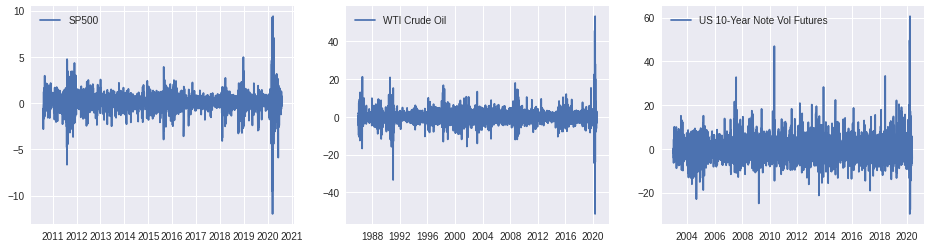

In [17]:
# Calculate returns
ret_sp500 = 100*sp500.pct_change().dropna()
ret_wti_oil = 100*wti_oil.pct_change().dropna()
ret_us_notes = 100*us_notes.pct_change().dropna()

fig, axes = plt.subplots(1,3,figsize=(16,4))
axes[0].plot(ret_sp500,label='SP500');axes[0].legend();
axes[1].plot(ret_wti_oil,label='WTI Crude Oil');axes[1].legend()
axes[2].plot(ret_us_notes,label='US 10-Year Note Vol Futures');axes[2].legend()